
------------------------- Projeto Final -------------------------

Digite 1 para visualizar o resultado do metodo de Elbow
Digite 2 para visualizar o resultado do coeficiente do Silhouette
Digite 3 para visualizar os clusters gerados
Digite 4 para sair

Digite sua opcao: 3


Cluster que relaciona Income X Infected: 


<Figure size 288x216 with 0 Axes>

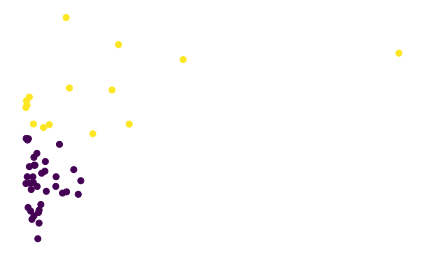



Cluster que relaciona Income X Deaths: 


<Figure size 288x216 with 0 Axes>

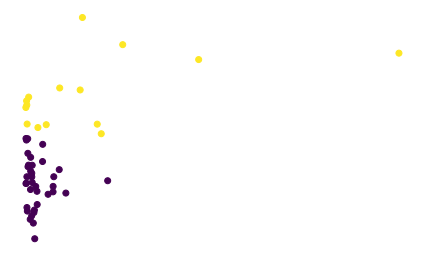



Cluster que considera Gini X Infected: 


<Figure size 288x216 with 0 Axes>

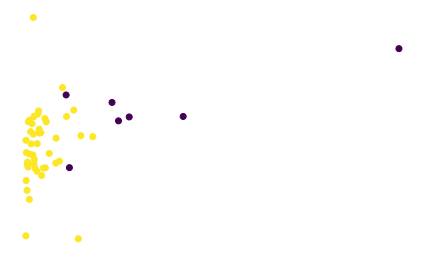



Cluster que considera Gini X Deaths: 


<Figure size 288x216 with 0 Axes>

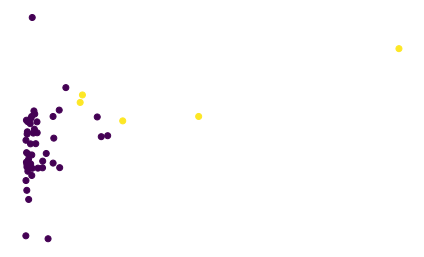


------------------------- Projeto Final -------------------------

Digite 1 para visualizar o resultado do metodo de Elbow
Digite 2 para visualizar o resultado do coeficiente do Silhouette
Digite 3 para visualizar os clusters gerados
Digite 4 para sair


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import time

data_cl1 = pd.read_csv('COVID19_state.csv')
data_cl2 = pd.read_csv('COVID19_state.csv')
data_cl3 = pd.read_csv('COVID19_state.csv')
data_cl4 = pd.read_csv('COVID19_state.csv')

#REMOVENDO DADOS QUE NÃO SERÃO RELEVANTES PARA O NOSSO MODELO

#OBSERVANDO SOMENTE INCOME E INFECTED
data_cl1.drop(['State', 'Sex Ratio', 'Smoking Rate', 'Flu Deaths', 'Respiratory Deaths', 'Physicians', 'Pollution', 
                  'Med-Large Airports', 'Temperature', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+', 
                  'School Closure Date', 'Population', 'Pop Density', 'ICU Beds', 'Hospitals', 'Tested', 'Deaths',
                  'GDP', 'Gini', 'Unemployment', 'Health Spending'], 
                   axis=1, inplace=True)

#OBSERVANDO SOMENTE INCOME E DEATHS
data_cl2.drop(['State', 'Sex Ratio', 'Smoking Rate', 'Flu Deaths', 'Respiratory Deaths', 'Physicians', 'Pollution', 
                  'Med-Large Airports', 'Temperature', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+', 
                  'School Closure Date', 'Population', 'Pop Density', 'ICU Beds', 'Hospitals', 'Tested', 'Infected',
                  'GDP', 'Gini', 'Unemployment', 'Health Spending'], 
                   axis=1, inplace=True)

#OBSERVANDO SOMENTE INCOME, GINI E INFECTED
data_cl3.drop(['State', 'Sex Ratio', 'Smoking Rate', 'Flu Deaths', 'Respiratory Deaths', 'Physicians', 'Pollution', 
                  'Med-Large Airports', 'Temperature', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+', 
                  'School Closure Date', 'Population', 'Pop Density', 'ICU Beds', 'Hospitals', 'Tested', 'Deaths',
                  'GDP', 'Unemployment', 'Health Spending'], 
                   axis=1, inplace=True)

#OBSERVANDO SOMENTE INCOME, GINI E DEATHS
data_cl4.drop(['State', 'Sex Ratio', 'Smoking Rate', 'Flu Deaths', 'Respiratory Deaths', 'Physicians', 'Pollution', 
                  'Med-Large Airports', 'Temperature', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+', 
                  'School Closure Date', 'Population', 'Pop Density', 'ICU Beds', 'Hospitals', 'Tested', 'Infected',
                  'GDP', 'Unemployment', 'Health Spending'], 
                   axis=1, inplace=True)


def dados(dados):
    mms = MinMaxScaler()
    mms.fit(dados)
    data_transformed = mms.transform(dados)
    
    return data_transformed


def plot_clustering(data, labels, title=None):
        x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
        data = (data - x_min) / (x_max - x_min)
        fig = plt.figure(1, figsize=(4, 3))
        plt.figure(figsize=(6, 4))
        plt.scatter(data[:, 0], data[:, 1],
                c=labels.astype(np.float))
        plt.xticks([])
        plt.yticks([])
        if title is not None:
            plt.title(title, size=17)
        plt.axis('off')
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        

def k_means(dados):
    #EXECUTA O ALGORITMO K-MEANS COM BASE NO NUMERO DE CLUSTERS PASSADOS
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(dados)
    labels = kmeans.labels_
    plot_clustering(dados, labels)
    plt.show()

 
def metodo_elbow(dados):
    #UTILIZANDO METODO ELBOW PARA DESCOBRIR NUMERO DE CLUSTERS
    Sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(dados)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    
def coef_silhouette(data_transformed):
    range_n_clusters = [2, 3, 4, 5, 6]
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(data_transformed) + (n_clusters + 1) * 10])
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(data_transformed)
    # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(data_transformed, cluster_labels)
        print("Para n_clusters =", n_clusters,
              "O score_silhouette médio é :", silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data_transformed, cluster_labels)
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color,       alpha=0.7)
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(data_transformed[:, 0], data_transformed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
    plt.show()
        

def menu():
    opcao = 0
    while opcao != 4:
        print("\n------------------------- Projeto Final -------------------------")
        print("\nDigite 1 para visualizar o resultado do metodo de Elbow")
        print("Digite 2 para visualizar o resultado do coeficiente do Silhouette")
        print("Digite 3 para visualizar os clusters gerados")
        print("Digite 4 para sair")
        opcao = int(input("\nDigite sua opcao: "))

        if opcao == 1:
            print("\n\nMetodo de Elbow: ")
            dados_elbow = dados(data_cl1)
            metodo_elbow(dados_elbow)
    
        elif opcao == 2:
            print("\n\nCoeficiente de Silhouette: \n")
            dados_silhouette = dados(data_cl1)
            coef_silhouette(dados_silhouette)

        elif opcao == 3:
            print("\n\nCluster que relaciona Income X Infected: ")
            dados1 = dados(data_cl1)
            k_means(dados1)
    
            print("\n\nCluster que relaciona Income X Deaths: ")
            dados1 = dados(data_cl2)
            k_means(dados1)
    
            print("\n\nCluster que considera Gini X Infected: ")
            dados1 = dados(data_cl3)
            k_means(dados1)
    
            print("\n\nCluster que considera Gini X Deaths: ")
            dados1 = dados(data_cl4)
            k_means(dados1)

        elif opcao == 4:
            print("Saindo...")
    
        else:
            print("Opcao invalida!")
            
menu()